# Data Profiling for the US Accidents (2016 - 2021) dataset

#### Doing some basic data profiling here using pandas - the main data profiling with a very elaborate data profiling report has been done as well and the report has been saved for cleansing usage
#### Also plotting a few graphs here using relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
#read the dataset

In [3]:
df.columns
#printing all column names

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.dtypes
#checking data types of all columns, this will help in deciding strategy for filling NULL/NaN values

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


#### Calculate & visualize the percentage NULL values for each column or feature

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

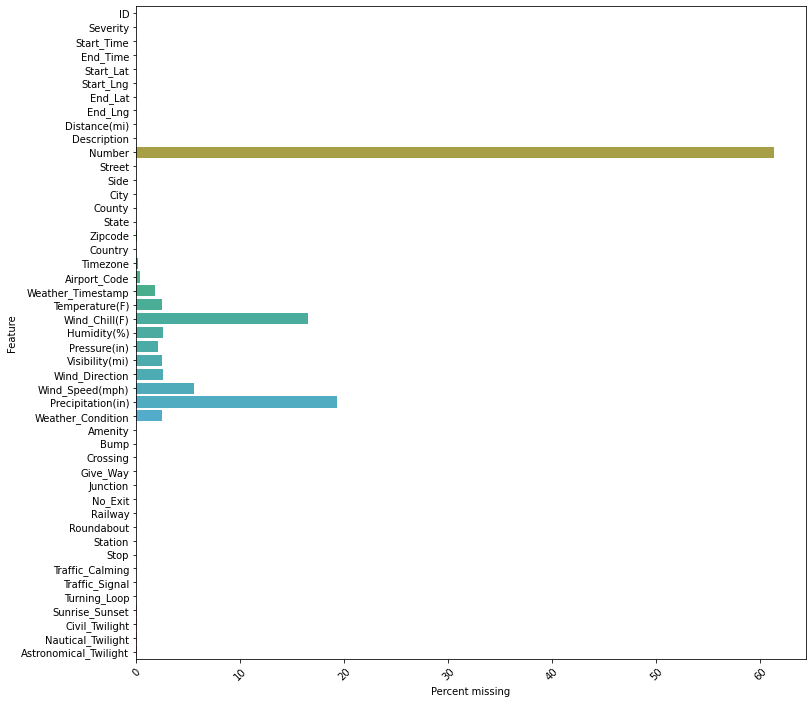

In [7]:
null_vals = df.isna().sum()/len(df)*100
df_null_vals = pd.DataFrame(null_vals)
df_null_vals.reset_index(inplace = True)
df_null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (12,12))
plt.xticks(rotation = 45)
sns.barplot(x = "Percent missing", y ="Feature", data = df_null_vals, orient = "h")

#### Print out the number of NaN/NULL values in each column

In [8]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [9]:
df_all_nulls = df[df.isna().any(axis=1)]
df_all_nulls
#printing all the rows which have a NULL value for any of the columns

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df[df['Sunrise_Sunset'].isna()]
#printing rows which have NULL/NaN value for Sunrise_Sunset column

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
34903,A-34904,4,2016-12-11 16:33:08,2016-12-11 22:33:08,41.03674,-73.67549,41.083450,-73.665300,3.271,Closed between CT-120A/King St/Exit 27 and Rou...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
43106,A-43107,4,2017-01-10 04:51:19,2017-01-10 10:51:19,40.84309,-84.80236,40.844250,-84.784350,0.945,Closed between State Line Rd and Kings Church ...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
43114,A-43115,4,2017-01-10 06:13:46,2017-01-10 12:13:46,40.84309,-84.80236,40.844250,-84.784350,0.945,Closed between State Line Rd and Kings Church ...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
43248,A-43249,4,2017-01-10 09:42:10,2017-01-10 15:42:10,40.84309,-84.80236,40.841207,-84.841024,2.025,Closed between State Line Rd and Decatur - Roa...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
55225,A-55226,4,2016-11-17 06:51:47,2016-11-17 12:51:47,41.03674,-73.67549,41.037639,-73.674930,0.069,Closed at CT-120A/King St/Exit 27 - Road close...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717507,A-2717508,2,2017-12-13 18:38:56,2017-12-14 00:38:56,38.96571,-77.00246,38.971000,-76.998430,0.425,At Sheridan St - Accident.,...,False,False,False,False,True,False,NaN,NaN,NaN,NaN
2726005,A-2726006,2,2017-11-06 09:08:42,2017-11-06 15:08:42,41.03674,-73.67549,41.083450,-73.665300,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2733763,A-2733764,4,2017-11-24 04:48:21,2017-11-24 10:48:21,40.58687,-92.98509,40.608917,-92.964332,1.873,Closed between State Highway 5 and 170th Ave -...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2738890,A-2738891,2,2017-10-09 15:46:08,2017-10-09 21:46:08,41.03674,-73.67549,41.083450,-73.665300,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN


#### Visualizing the correlation between each column as a heatmap

<AxesSubplot:>

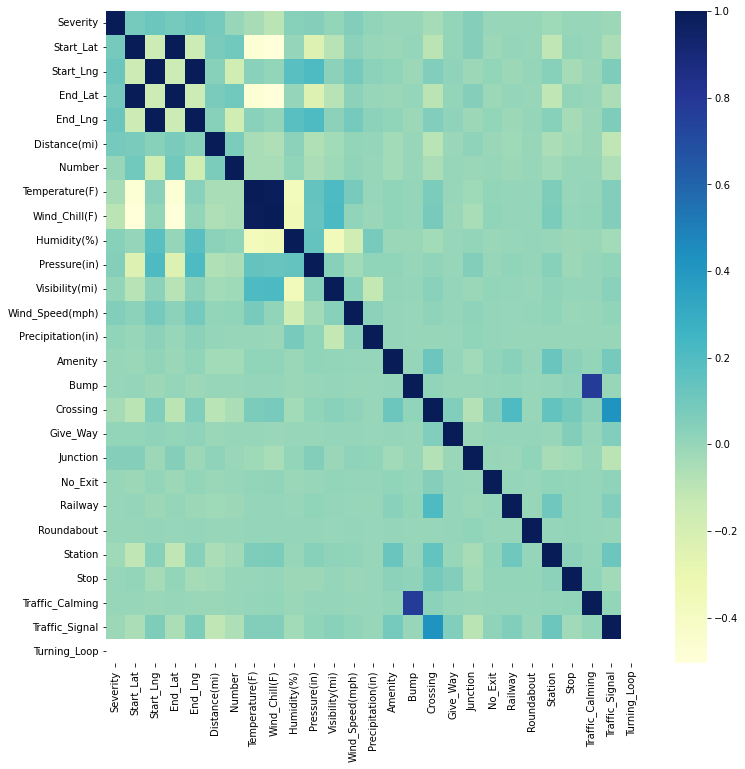

In [11]:
corr_matrix = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, cmap = "YlGnBu")

#### The following 3 cells are used to generate the data profiling report
The cells have been commented out since this has already ran before. The report is saved as a HTML document. In order to avoid running this again and using up a lot of time and memory, it has now been commented out

In [12]:
#from pandas_profiling import ProfileReport

In [13]:
#us_accidents_report = ProfileReport(df, title = "US Accidents Profile Report")

In [14]:
#us_accidents_report.to_file("US_Accidents_Data_Profile_Group5.html")

# Data Cleansing for the US Accidents (2016 - 2021) dataset

#### Changing the column name to exclude _ and make everything CamelCase
#### For columns which has units in them adding a _ to differentiate

In [15]:
df.columns = df.columns.str.replace("[_,)]", "", regex = True)
df.columns = df.columns.str.replace("(", "_", regex = False)
df.columns = df.columns.str.replace('Humidity_%', 'Humidity_Perc')

In [16]:
df.columns

Index(['ID', 'Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng',
       'EndLat', 'EndLng', 'Distance_mi', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'AirportCode', 'WeatherTimestamp', 'Temperature_F', 'WindChill_F',
       'Humidity_Perc', 'Pressure_in', 'Visibility_mi', 'WindDirection',
       'WindSpeed_mph', 'Precipitation_in', 'WeatherCondition', 'Amenity',
       'Bump', 'Crossing', 'GiveWay', 'Junction', 'NoExit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'TrafficCalming', 'TrafficSignal',
       'TurningLoop', 'SunriseSunset', 'CivilTwilight', 'NauticalTwilight',
       'AstronomicalTwilight'],
      dtype='object')

#### Change data type of timestamp columns to DateTime

In [17]:
df[['StartTime', 'EndTime']] = df[['StartTime', 'EndTime']].apply(pd.to_datetime)
# doubt: can we change the column name/naming convention? Renamethis column to: StartTime and EndTime

#### The Weather_Timestamp column is also a timestamp column but it has NaN values. Replaces these NaN values with the maximum possible timestamp in Pandas, which is 2262-04-11 00:00:00

In [18]:
df['WeatherTimestamp'] = df['WeatherTimestamp'].fillna('2262-04-11 00:00:00')
df['WeatherTimestamp'] = df['WeatherTimestamp'].apply(pd.to_datetime)

#### Creating a new 'AccidentYear' column which will be of help while doing visualization

In [19]:
df['AccidentYear'] = df['StartTime'].dt.year

In [20]:
df['AccidentYear'].value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: AccidentYear, dtype: int64

#### Filling all the NULL values in various column with placeholder respective placeholders

#### For all string columns, fill NULLs with 'Not listed'

In [21]:
string_type_columns = ['Street', 'City', 'Zipcode', 'Timezone', 'AirportCode', 'WindDirection', 'WeatherCondition',
                       'SunriseSunset', 'CivilTwilight', 'NauticalTwilight', 'AstronomicalTwilight']
#first making a list of column names which are of string type and have NULL values

In [22]:
df[string_type_columns] = df[string_type_columns].fillna('Not listed')

#### For all int/float columns, fill NULLs with -99

In [23]:
integer_type_columns = ['Number', 'Temperature_F', 'WindChill_F', 'Humidity_Perc', 'Pressure_in', 'Visibility_mi', 
                        'WindSpeed_mph', 'Precipitation_in']

In [24]:
df[integer_type_columns] = df[integer_type_columns].fillna(-99)

#### No NULLs in the 'Side' column, but only one value is N. Replace it with the most frequent occuring value which is R

In [25]:
df['Side'] = df['Side'].replace(['N'], 'R')

In [26]:
df['Side'].value_counts() #just to verify that 'N' is replaced

R    2353310
L     492032
Name: Side, dtype: int64

In [27]:
df.dtypes

ID                              object
Severity                         int64
StartTime               datetime64[ns]
EndTime                 datetime64[ns]
StartLat                       float64
StartLng                       float64
EndLat                         float64
EndLng                         float64
Distance_mi                    float64
Description                     object
Number                         float64
Street                          object
Side                            object
City                            object
County                          object
State                           object
Zipcode                         object
Country                         object
Timezone                        object
AirportCode                     object
WeatherTimestamp        datetime64[ns]
Temperature_F                  float64
WindChill_F                    float64
Humidity_Perc                  float64
Pressure_in                    float64
Visibility_mi            

In [28]:
df.isna().sum()

ID                      0
Severity                0
StartTime               0
EndTime                 0
StartLat                0
StartLng                0
EndLat                  0
EndLng                  0
Distance_mi             0
Description             0
Number                  0
Street                  0
Side                    0
City                    0
County                  0
State                   0
Zipcode                 0
Country                 0
Timezone                0
AirportCode             0
WeatherTimestamp        0
Temperature_F           0
WindChill_F             0
Humidity_Perc           0
Pressure_in             0
Visibility_mi           0
WindDirection           0
WindSpeed_mph           0
Precipitation_in        0
WeatherCondition        0
Amenity                 0
Bump                    0
Crossing                0
GiveWay                 0
Junction                0
NoExit                  0
Railway                 0
Roundabout              0
Station     

The following 2 new columns that are created in the 2 cells below are done for the data mapping purpose where we need a unique key value.

These 2 cells are only used for data loading into Neo4j and not important in terms of business 

In [29]:
#for Neo4j scripting purpose
df['TrafficCoordinates'] = df['StartLat'].astype(str) + ", " + df['StartLng'].astype(str) + ", " + df['EndLat'].astype(str)+ ", " + df['EndLng'].astype(str)

In [30]:
df['TrafficDuration'] = df['StartTime'].astype(str) + ", " + df['EndTime'].astype(str)

### No NaNs/NULLs remain in any column of the dataset. The dataset is cleaned!

In [31]:
df.to_csv('US_Accidents_cleaned.csv', index=False)
#saving the cleaned data frame as a new CSV

In [2]:
df = pd.read_csv('US_Accidents_cleaned.csv')
#read the dataset

In [3]:
df

,ID,Severity,StartTime,EndTime,StartLat,StartLng,EndLat,EndLng,Distance_mi,Description,...,TrafficCalming,TrafficSignal,TurningLoop,SunriseSunset,CivilTwilight,NauticalTwilight,AstronomicalTwilight,AccidentYear,TrafficCoordinates,TrafficDuration
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,Night,Night,Night,Night,2016,"40.10891, -83.09286, 40.11206, -83.03187","2016-02-08 00:37:08, 2016-02-08 06:37:08.00000..."
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,Night,Night,Night,Night,2016,"39.86542, -84.0628, 39.86501, -84.04873","2016-02-08 05:56:20, 2016-02-08 11:56:20.00000..."
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,Night,Night,Night,Day,2016,"39.10266, -84.52468, 39.10209, -84.52396","2016-02-08 06:15:39, 2016-02-08 12:15:39.00000..."
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,Night,Night,Day,Day,2016,"41.06213, -81.53784, 41.06217, -81.53546999999998","2016-02-08 06:51:45, 2016-02-08 12:51:45.00000..."
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,Day,Day,Day,Day,2016,"39.172393, -84.49279200000002, 39.170476, -84....","2016-02-08 07:53:43, 2016-02-08 13:53:43.00000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,Day,Day,Day,Day,2019,"34.00248, -117.37936, 33.99888, -117.37094","2019-08-23 18:03:25, 2019-08-23 18:32:01.00000..."
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,Day,Day,Day,Day,2019,"32.76696, -117.14806000000002, 32.76555, -117....","2019-08-23 19:11:30, 2019-08-23 19:38:23.00000..."
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,Day,Day,Day,Day,2019,"33.77545, -117.84779, 33.7774, -117.85727","2019-08-23 19:00:21, 2019-08-23 19:28:49.00000..."
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,Day,Day,Day,Day,2019,"33.992459999999994, -118.40302, 33.98311, -118...","2019-08-23 19:00:21, 2019-08-23 19:29:42.00000..."


In [4]:
df['AccidentYear'].value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: AccidentYear, dtype: int64

In [7]:
df_sampled = df.sample(frac =.01, ignore_index = True)

In [8]:
df_sampled

,ID,Severity,StartTime,EndTime,StartLat,StartLng,EndLat,EndLng,Distance_mi,Description,...,TrafficCalming,TrafficSignal,TurningLoop,SunriseSunset,CivilTwilight,NauticalTwilight,AstronomicalTwilight,AccidentYear,TrafficCoordinates,TrafficDuration
0,A-408764,2,2021-11-18 01:07:00.000000000,2021-11-18 02:22:09.000000000,30.442862,-85.874004,30.443136,-85.874010,0.019,Incident on DOG TRACK RD near CAPTAIN FRITZ RD...,...,False,True,False,Night,Night,Night,Night,2021,"30.442862, -85.874004, 30.443136, -85.87401","2021-11-18 01:07:00, 2021-11-18 02:22:09.00000..."
1,A-645069,2,2021-11-12 06:14:30,2021-11-12 07:33:18,38.269060,-77.945498,38.269320,-77.928368,0.929,On VA-20 in the County of Orange in the vicini...,...,False,False,False,Night,Night,Day,Day,2021,"38.26906, -77.945498, 38.26932, -77.928368","2021-11-12 06:14:30, 2021-11-12 07:33:18.00000..."
2,A-600734,2,2021-09-23 16:37:31,2021-09-23 17:54:19,34.284416,-79.909065,34.285379,-79.910967,0.127,Incident on ROGERS RD near INDIAN BRANCH RD Ex...,...,False,False,False,Day,Day,Day,Day,2021,"34.284416, -79.909065, 34.285379, -79.910967","2021-09-23 16:37:31, 2021-09-23 17:54:19.00000..."
3,A-1950772,2,2020-12-07 12:23:30,2020-12-08 04:06:01,28.428795,-81.407121,28.428975,-81.404630,0.152,Slow traffic on US-92 E - US-17 N - US-441 N f...,...,False,False,False,Day,Day,Day,Day,2020,"28.428795, -81.40712099999998, 28.428975, -81....","2020-12-07 12:23:30, 2020-12-08 04:06:01.00000..."
4,A-388339,2,2021-11-09 18:59:00,2021-11-09 20:22:38,33.638815,-117.344412,33.638426,-117.343770,0.046,Incident on GRAND AVE near HOUSE 17671 Right s...,...,False,False,False,Night,Night,Night,Night,2021,"33.638815, -117.344412, 33.638426, -117.34377","2021-11-09 18:59:00, 2021-11-09 20:22:38.00000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28448,A-109926,2,2017-01-10 13:53:17,2017-01-10 19:53:17,37.560820,-122.302940,37.563630,-122.306010,0.257,At Kehoe Ave/Exit 415 - Accident.,...,False,False,False,Day,Day,Day,Day,2017,"37.56082, -122.30294, 37.56363, -122.30601","2017-01-10 13:53:17, 2017-01-10 19:53:17.00000..."
28449,A-1344523,2,2021-06-28 19:55:00,2021-06-28 20:52:30,34.140763,-117.248329,34.135979,-117.236718,0.742,Slow traffic on CA-210 E from Del Rosa Ave (CA...,...,False,False,False,Day,Day,Day,Day,2021,"34.140763, -117.248329, 34.135979, -117.236718","2021-06-28 19:55:00, 2021-06-28 20:52:30.00000..."
28450,A-2419578,2,2019-10-16 10:58:00,2019-10-16 12:15:00,40.388240,-111.835720,40.388240,-111.835380,0.018,At I-15 - Accident.,...,False,True,False,Day,Day,Day,Day,2019,"40.38824, -111.83572, 40.38824, -111.83538","2019-10-16 10:58:00, 2019-10-16 12:15:00.00000..."
28451,A-971142,2,2021-10-26 15:31:04,2021-10-26 15:51:31,25.857208,-80.209463,25.861819,-80.209631,0.319,Stationary traffic on US-441 N from FL-934/81s...,...,False,False,False,Day,Day,Day,Day,2021,"25.857208, -80.209463, 25.861819, -80.209631","2021-10-26 15:31:04, 2021-10-26 15:51:31.00000..."


In [9]:
df_sampled['AccidentYear'].value_counts()

2021    15106
2020     6289
2019     2624
2018     1705
2017     1602
2016     1127
Name: AccidentYear, dtype: int64

In [10]:
df_sampled.to_csv('US_Accidents_sampled.csv', index=False)
#saving the cleaned data frame as a new CSV